# Data Wrangling: Join, Combine and Reshape

# **T. Prathima**, Assistant Professor, Dept. of IT, CBIT(A)

Reference:
Python for Data Analysis DATA WRANGLING WITH PANDAS, 
NUMPY, AND IPYTHON
Author: Wes McKinney

In [ ]:
import numpy as np
import pandas as pd
pd.options.display.max_rows = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)


## Hierarchical Indexing

In [ ]:
#Hierarchical indexing is an important feature of pandas that enables you to 
#have multiple (two or more) index levels on an axis. Somewhat abstractly, 
#it provides a way for you to work with higher dimensional data in a lower 
#dimensional form.

In [ ]:
data = pd.Series(np.random.randn(9),
                 index=[['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'],
                        [  1,  2,   3,   1,    3,   1,   2,   2,   3]])
data

#pd.Series(data,index=[9,4,1,0])

a  1   -0.204708
   2    0.478943
   3   -0.519439
b  1   -0.555730
   3    1.965781
c  1    1.393406
   2    0.092908
d  2    0.281746
   3    0.769023
dtype: float64

In [ ]:
#What you’re seeing is a Series with a MultiIndex as its index. The “gaps” in 
#the index display mean “use the label directly above”: 
data.index

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 3),
            ('c', 1),
            ('c', 2),
            ('d', 2),
            ('d', 3)],
           )

In [ ]:
#With a hierarchically indexed object, so-called partial indexing is possible, 
#enabling you to concisely select subsets of the data
print(data['b'])
print(data['b':'c'])
data.loc[['b', 'd']]

1   -0.555730
3    1.965781
dtype: float64
b  1   -0.555730
   3    1.965781
c  1    1.393406
   2    0.092908
dtype: float64


b  1   -0.555730
   3    1.965781
d  2    0.281746
   3    0.769023
dtype: float64

In [ ]:
#Selection is even possible from an “inner” level
data.loc[:, 2]

a    0.478943
c    0.092908
d    0.281746
dtype: float64

In [ ]:
#Hierarchical indexing plays an important role in reshaping data and group-based
#operations like forming a pivot table. For example, you could rearrange the 
#data into a DataFrame using its unstack method
data.unstack()

,1,2,3
a,-0.204708,0.478943,-0.519439
b,-0.555730,NaN,1.965781
c,1.393406,0.092908,NaN
d,NaN,0.281746,0.769023


In [ ]:
#The inverse operation of unstack is stack:
data.unstack().stack()

a  1   -0.204708
   2    0.478943
   3   -0.519439
b  1   -0.555730
   3    1.965781
c  1    1.393406
   2    0.092908
d  2    0.281746
   3    0.769023
dtype: float64

In [ ]:
#With a DataFrame, either axis can have a hierarchical index:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)),                 #0,1,2,.....11
                     index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                     columns=[['Ohio', 'Ohio', 'Colorado'],
                              ['Green', 'Red', 'Green']])
frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [ ]:
#frame = pd.DataFrame(np.arange(12).reshape((4, 3)))
#frame

In [ ]:
##The hierarchical levels can have names (as strings or any Python objects). 
#If so, these will show up in the console output:
frame.index.names = ['key1', 'key2']
frame.columns.names = ['state', 'color']
frame


#Be careful to distinguish the index names 'state' and 'color'
#from the row labels.

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [ ]:
#With partial column indexing you can similarly select groups of columns:
frame['Ohio']

color      Green  Red
key1 key2            
a    1         0    1
     2         3    4
b    1         6    7
     2         9   10

A MultiIndex can be created by itself and then reused; the columns in the preceding DataFrame with level names could be created like this:

#MultiIndex.from_arrays([['Ohio', 'Ohio', 'Colorado'], ['Green', 'Red', 'Green']],names=['state', 'color'])

### Reordering and Sorting Levels

In [ ]:
#At times you will need to rearrange the order of the levels on an axis or 
#sort the data by the values in one specific level. The swaplevel takes two 
#level numbers or names and returns a new object with the levels interchanged

In [ ]:
print(frame)
frame.swaplevel('key1', 'key2')


state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11


state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

In [ ]:
print(frame)
print(frame.sort_index(level=1))
frame.swaplevel(0, 1).sort_index(level=0)

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11
state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
b    1        6   7        8
a    2        3   4        5
b    2        9  10       11


state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
     b        6   7        8
2    a        3   4        5
     b        9  10       11

### Summary Statistics by Level

In [ ]:
#Many descriptive and summary statistics on DataFrame and Series have a level
#option in which you can specify the level you want to aggregate by on a particular
#axis.
print(frame)
print(frame.sum(level='key2'))
frame.sum(level='color', axis=1)

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11
state  Ohio     Colorado
color Green Red    Green
key2                    
1         6   8       10
2        12  14       16


color      Green  Red
key1 key2            
a    1         2    1
     2         8    4
b    1        14    7
     2        20   10

### Indexing with a DataFrame's columns

In [ ]:
#It’s not unusual to want to use one or more columns from a DataFrame as the row
#index; alternatively, you may wish to move the row index into the DataFrame’s 
#columns.
frame = pd.DataFrame({'a': range(7), 'b': range(7, 0, -1),
                      'c': ['one', 'one', 'one', 'two', 'two',
                            'two', 'two'],
                      'd': [0, 1, 2, 0, 1, 2, 3]})
frame

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


In [ ]:
#DataFrame’s set_index function will create a new DataFrame using one or more of
#its columns as the index:
frame2 = frame.set_index(['c', 'd'])
frame2

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

In [ ]:
#By default the columns are removed from the DataFrame, though you can leave 
#them in:
frame.set_index(['c', 'd'], drop=False)

a  b    c  d
c   d              
one 0  0  7  one  0
    1  1  6  one  1
    2  2  5  one  2
two 0  3  4  two  0
    1  4  3  two  1
    2  5  2  two  2
    3  6  1  two  3

In [ ]:
#reset_index, on the other hand, does the opposite of set_index; the hierarchical
#index levels are moved into the columns:
frame2.reset_index()

,c,d,a,b
0,one,0,0,7
1,one,1,1,6
2,one,2,2,5
3,two,0,3,4
4,two,1,4,3
5,two,2,5,2
6,two,3,6,1


## Combining and Merging Datasets

In [ ]:
#Data contained in pandas objects can be combined together in a number of ways:
#i. pandas.merge connects rows in DataFrames based on one or more keys. This
#will be familiar to users of SQL or other relational databases, as it implements
#database join operations.
#ii. pandas.concat concatenates or “stacks” together objects along an axis.
#iii. The combine_first instance method enables splicing together overlapping data
#to fill in missing values in one object with values from another.

### Database-Style DataFrame Joins

In [ ]:
#Merge or join operations combine datasets by linking rows using one or more 
#keys. These operations are central to relational databases (e.g., SQL-based). 
#The merge function in pandas is the main entry point for using these algorithms 
#on your data.

In [ ]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data2': range(3)})
print(df1)
df2

  key  data1
0   b      0
1   b      1
2   a      2
3   c      3
4   a      4
5   a      5
6   b      6


,key,data2
0,a,0
1,b,1
2,d,2


In [ ]:
#This is an example of a many-to-one join; the data in df1 has multiple rows 
#labeled a and b, whereas df2 has only one row for each value in the key column. 
#Calling merge with these objects we obtain:
pd.merge(df1, df2)

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [ ]:
#in the previous cell which column to join on isnt specified. If that information
# is not specified, merge uses the overlapping column names as the keys. It’s a  
#good practice to specify explicitly, though:
pd.merge(df1, df2, on='key') 

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [ ]:
#If  column names are different in each object, you can specify them separately:
df3 = pd.DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df4 = pd.DataFrame({'rkey': ['a', 'b', 'd'],
                    'data2': range(3)})
print(df3)
print(df4)
pd.merge(df3, df4, left_on='lkey', right_on='rkey')

#You may notice that the 'c' and 'd' values and associated data are missing 
#from the result. By default merge does an 'inner' join; the keys in the result 
#are the intersection, or the common set found in both tables. Other possible 
#options are 'left', 'right', and 'outer'. 

  lkey  data1
0    b      0
1    b      1
2    a      2
3    c      3
4    a      4
5    a      5
6    b      6
  rkey  data2
0    a      0
1    b      1
2    d      2


,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0


In [ ]:
#The outer join takes the union of the keys, combining the
#effect of applying both left and right joins:
print(df1)
print(df2)
pd.merge(df1, df2, how='outer')

  key  data1
0   b      0
1   b      1
2   a      2
3   c      3
4   a      4
5   a      5
6   b      6
  key  data2
0   a      0
1   b      1
2   d      2


,key,data1,data2
0,b,0.0,1.0
1,b,1.0,1.0
2,b,6.0,1.0
3,a,2.0,0.0
4,a,4.0,0.0
5,a,5.0,0.0
6,c,3.0,NaN
7,d,NaN,2.0


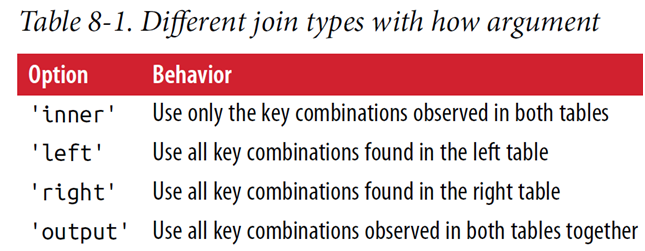

In [ ]:
#Many-to-many merges have well-defined:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                    'data1': range(6)})
df2 = pd.DataFrame({'key': ['a', 'b', 'a', 'b', 'd'],
                    'data2': range(5)})
print(df1)
print(df2)
pd.merge(df1, df2, on='key', how='left')

  key  data1
0   b      0
1   b      1
2   a      2
3   c      3
4   a      4
5   b      5
  key  data2
0   a      0
1   b      1
2   a      2
3   b      3
4   d      4


,key,data1,data2
0,b,0,1.0
1,b,0,3.0
2,b,1,1.0
3,b,1,3.0
4,a,2,0.0
5,a,2,2.0
6,c,3,NaN
7,a,4,0.0
8,a,4,2.0
9,b,5,1.0


In [ ]:
#Many-to-many joins form the Cartesian product of the rows. Since there were 
#three 'b' rows in the left DataFrame and two in the right one, there are six 
#'b' rows in the result. The join method only affects the distinct key values 
#appearing in the result: 
pd.merge(df1, df2, how='inner')

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,b,5,1
5,b,5,3
6,a,2,0
7,a,2,2
8,a,4,0
9,a,4,2


In [ ]:
#To merge with multiple keys, pass a list of column names:
left = pd.DataFrame({'key1': ['foo', 'foo', 'bar'],
                     'key2': ['one', 'two', 'one'],
                     'lval': [1, 2, 3]})
right = pd.DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],
                      'key2': ['one', 'one', 'one', 'two'],
                      'rval': [4, 5, 6, 7]})
print(left)
print(right)
pd.merge(left, right, on=['key1', 'key2'], how='outer')

  key1 key2  lval
0  foo  one     1
1  foo  two     2
2  bar  one     3
  key1 key2  rval
0  foo  one     4
1  foo  one     5
2  bar  one     6
3  bar  two     7


,key1,key2,lval,rval
0,foo,one,1.0,4.0
1,foo,one,1.0,5.0
2,foo,two,2.0,NaN
3,bar,one,3.0,6.0
4,bar,two,NaN,7.0


In [ ]:
#A last issue to consider in merge operations is the treatment of overlapping 
#column names. While you can address the overlap manually merge has a suffixes 
#option for specifying strings to append to overlapping names in the left and
# right DataFrame objects
print(left)
print(right)
print(pd.merge(left, right, on='key1'))
pd.merge(left, right, on='key1', suffixes=('_left', '_right'))

  key1 key2  lval
0  foo  one     1
1  foo  two     2
2  bar  one     3
  key1 key2  rval
0  foo  one     4
1  foo  one     5
2  bar  one     6
3  bar  two     7
  key1 key2_x  lval key2_y  rval
0  foo    one     1    one     4
1  foo    one     1    one     5
2  foo    two     2    one     4
3  foo    two     2    one     5
4  bar    one     3    one     6
5  bar    one     3    two     7


,key1,key2_left,lval,key2_right,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


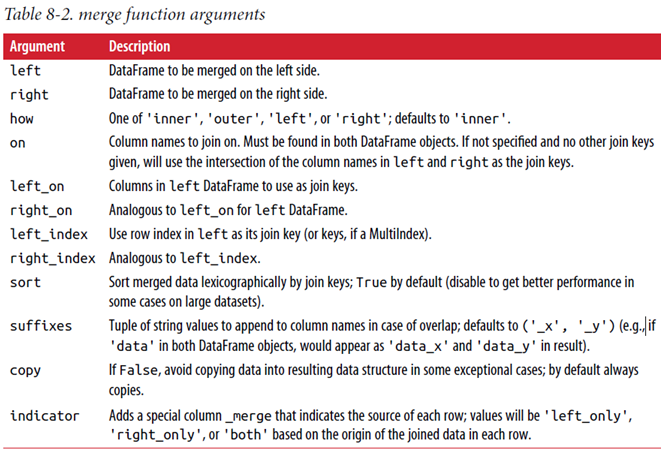

### Merging on Index

In [ ]:
##Joining using the DataFrame’s row index 
#In some cases, the merge key(s) in a DataFrame will be found in its index. 
#In this case, you can pass left_index=True or right_index=True (or both) to 
#indicate that the index should be used as the merge key:

In [ ]:
left1 = pd.DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],
                      'value': range(6)})

right1 = pd.DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])
print(left1)
print(right1)
pd.merge(left1, right1, left_on='key', right_index=True)

  key  value
0   a      0
1   b      1
2   a      2
3   a      3
4   b      4
5   c      5
   group_val
a        3.5
b        7.0


,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


In [ ]:
#Since the default merge method is to intersect the join keys, you can instead 
#form the union of them with an outer join:
pd.merge(left1, right1, left_on='key', right_index=True, how='outer')

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0
5,c,5,NaN


In [ ]:
#With hierarchically indexed data, things are more complicated, as joining on 
#index is implicitly a multiple-key merge:
lefth = pd.DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio',
                               'Nevada', 'Nevada'],
                      'key2': [2000, 2001, 2002, 2001, 2002],
                      'data': np.arange(5.)})
righth = pd.DataFrame(np.arange(12).reshape((6, 2)),
                      index=[['Nevada', 'Nevada', 'Ohio', 'Ohio',
                              'Ohio', 'Ohio'],
                             [2001, 2000, 2000, 2000, 2001, 2002]],
                      columns=['event1', 'event2'])
print(lefth)
print(righth)

     key1  key2  data
0    Ohio  2000   0.0
1    Ohio  2001   1.0
2    Ohio  2002   2.0
3  Nevada  2001   3.0
4  Nevada  2002   4.0
             event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11


In [ ]:
#In this case, you have to indicate multiple columns to merge on as a list 
#(note the handling of duplicate index values with how='outer'):
print(pd.merge(lefth, righth, left_on=['key1', 'key2'], right_index=True))

#Since the default merge method is to intersect the join keys, you can instead 
#form the union of them with an outer join:
pd.merge(lefth, righth, left_on=['key1', 'key2'],right_index=True, how='outer')

     key1  key2  data  event1  event2
0    Ohio  2000   0.0       4       5
0    Ohio  2000   0.0       6       7
1    Ohio  2001   1.0       8       9
2    Ohio  2002   2.0      10      11
3  Nevada  2001   3.0       0       1


,key1,key2,data,event1,event2
0,Ohio,2000,0.0,4.0,5.0
0,Ohio,2000,0.0,6.0,7.0
1,Ohio,2001,1.0,8.0,9.0
2,Ohio,2002,2.0,10.0,11.0
3,Nevada,2001,3.0,0.0,1.0
4,Nevada,2002,4.0,NaN,NaN
4,Nevada,2000,NaN,2.0,3.0


In [ ]:
#Using the indexes of both sides of the merge is also possible:
left2 = pd.DataFrame([[1., 2.], [3., 4.], [5., 6.]],
                     index=['a', 'c', 'e'],
                     columns=['Ohio', 'Nevada'])
right2 = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
                      index=['b', 'c', 'd', 'e'],
                      columns=['Missouri', 'Alabama'])
print(left2)
print(right2)
pd.merge(left2, right2, how='outer', left_index=True, right_index=True)

   Ohio  Nevada
a   1.0     2.0
c   3.0     4.0
e   5.0     6.0
   Missouri  Alabama
b       7.0      8.0
c       9.0     10.0
d      11.0     12.0
e      13.0     14.0


,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [ ]:
#DataFrame has a convenient join instance for merging by index. It can also be 
#used to combine together many DataFrame objects having the same or similar 
#indexes but non-overlapping columns. Previous example, can be written:
left2.join(right2, how='outer')

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [ ]:
#It also supports joining the index of the passed DataFrame on one of the 
#columns of the calling DataFrame:
print(left1)
print(right1)
left1.join(right1, on='key')

  key  value
0   a      0
1   b      1
2   a      2
3   a      3
4   b      4
5   c      5
   group_val
a        3.5
b        7.0


,key,value,group_val
0,a,0,3.5
1,b,1,7.0
2,a,2,3.5
3,a,3,3.5
4,b,4,7.0
5,c,5,NaN


In [ ]:
#for simple index-on-index merges, you can pass a list of DataFrames to join

another = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],
                       index=['a', 'c', 'e', 'f'],
                       columns=['New York', 'Oregon'])
print(another)
print(left2.join([right2, another]))
left2.join([right2, another], how='outer')

   New York  Oregon
a       7.0     8.0
c       9.0    10.0
e      11.0    12.0
f      16.0    17.0
   Ohio  Nevada  Missouri  Alabama  New York  Oregon
a   1.0     2.0       NaN      NaN       7.0     8.0
c   3.0     4.0       9.0     10.0       9.0    10.0
e   5.0     6.0      13.0     14.0      11.0    12.0


,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0,9.0,10.0
e,5.0,6.0,13.0,14.0,11.0,12.0
b,NaN,NaN,7.0,8.0,NaN,NaN
d,NaN,NaN,11.0,12.0,NaN,NaN
f,NaN,NaN,NaN,NaN,16.0,17.0


### Concatenating Along an Axis

In [ ]:
#Another kind of data combination operation is referred to interchangeably as 
#concatenation, binding, or stacking. NumPy’s concatenate function can do this 
#with NumPy arrays:

In [ ]:
arr = np.arange(12).reshape((3, 4))
print(arr)
print(np.concatenate([arr, arr], axis=1))
np.concatenate([arr, arr], axis=0)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1  2  3  0  1  2  3]
 [ 4  5  6  7  4  5  6  7]
 [ 8  9 10 11  8  9 10 11]]


array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [ ]:
#three Series with no index overlap:
s1 = pd.Series([0, 1], index=['a', 'b'])
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = pd.Series([5, 6], index=['f', 'g'])

In [ ]:
#Calling concat with these objects in a list glues together the values & indexes:
pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [ ]:
#By default concat works along axis=0, producing another Series. 
#If you pass axis=1, the result will instead be a DataFrame (axis=1 is columns):
pd.concat([s1, s2, s3], axis=1)

#In this case there is no overlap on the other axis, which as you can see is 
#the sorted union (the 'outer' join) of the indexes.

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [ ]:
 #You can instead intersect them by passing join='inner':
s4 = pd.concat([s1, s3])
print(s1,s3)
print(s4)
type(s4)

print(pd.concat([s1, s4], axis=1))
pd.concat([s1, s4], axis=1, join='inner')
#the 'f' and 'g' labels disappeared because of the join='inner' option.

a    0
b    1
dtype: int64 f    5
g    6
dtype: int64
a    0
b    1
f    5
g    6
dtype: int64
     0  1
a  0.0  0
b  1.0  1
f  NaN  5
g  NaN  6


,0,1
a,0,0
b,1,1


In [ ]:
#specify the axes to be used on the other axes with join_axes:
pd.concat([s1, s4], axis=1, join_axes=[['a', 'c', 'b', 'e']])
#"TypeError: concat() got an unexpected keyword argument 'join_axes'" as 
#join_axes is deprecated starting from Pandas v1.0.

TypeError: ignored

In [ ]:
#create a hierarchical index on the concatenation axis. 
#To do this, use the keys argument:
result = pd.concat([s1, s1, s3], keys=['one', 'two', 'three'])
print(result)
print(type(result))
print(result.unstack())
type(result.unstack())
#resukt.unstack().stack()

one    a    0
       b    1
two    a    0
       b    1
three  f    5
       g    6
dtype: int64
<class 'pandas.core.series.Series'>
         a    b    f    g
one    0.0  1.0  NaN  NaN
two    0.0  1.0  NaN  NaN
three  NaN  NaN  5.0  6.0


pandas.core.frame.DataFrame

In [ ]:
#In the case of combining Series along axis=1, the keys become the DataFrame 
#column headers:
pd.concat([s1, s2, s3], axis=1, keys=['one', 'two', 'three'])

,one,two,three
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [ ]:
#The same logic extends to DataFrame objects:
df1 = pd.DataFrame(np.arange(6).reshape(3, 2), index=['a', 'b', 'c'],
                   columns=['one', 'two'])
df2 = pd.DataFrame(5 + np.arange(4).reshape(2, 2), index=['a', 'c'],
                   columns=['three', 'four'])
print(df1)
print(df2)
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'])

   one  two
a    0    1
b    2    3
c    4    5
   three  four
a      5     6
c      7     8


level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [ ]:
#If you pass a dict of objects instead of a list, the dict’s keys will be 
# used for the keys option:
pd.concat({'level1': df1, 'level2': df2}, axis=1)

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [ ]:
#name the created axis levels with the names argument:
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'],
          names=['upper', 'lower'])

upper level1     level2     
lower    one two  three four
a          0   1    5.0  6.0
b          2   3    NaN  NaN
c          4   5    7.0  8.0

In [ ]:
#A last consideration concerns DataFrames in which the row index does not 
#contain any relevant data:
df1 = pd.DataFrame(np.random.randn(3, 4), columns=['a', 'b', 'c', 'd'])
df2 = pd.DataFrame(np.random.randn(2, 3), columns=['b', 'd', 'a'])
print(df1)
df2

          a         b         c         d
0 -0.204708  0.478943 -0.519439 -0.555730
1  1.965781  1.393406  0.092908  0.281746
2  0.769023  1.246435  1.007189 -1.296221


,b,d,a
0,0.274992,0.228913,1.352917
1,0.886429,-2.001637,-0.371843


In [ ]:
#you can pass ignore_index=True:
print(pd.concat([df1,df2]))
pd.concat([df1, df2], ignore_index=True)

          a         b         c         d
0 -0.204708  0.478943 -0.519439 -0.555730
1  1.965781  1.393406  0.092908  0.281746
2  0.769023  1.246435  1.007189 -1.296221
0  1.352917  0.274992       NaN  0.228913
1 -0.371843  0.886429       NaN -2.001637


,a,b,c,d
0,-0.204708,0.478943,-0.519439,-0.555730
1,1.965781,1.393406,0.092908,0.281746
2,0.769023,1.246435,1.007189,-1.296221
3,1.352917,0.274992,NaN,0.228913
4,-0.371843,0.886429,NaN,-2.001637


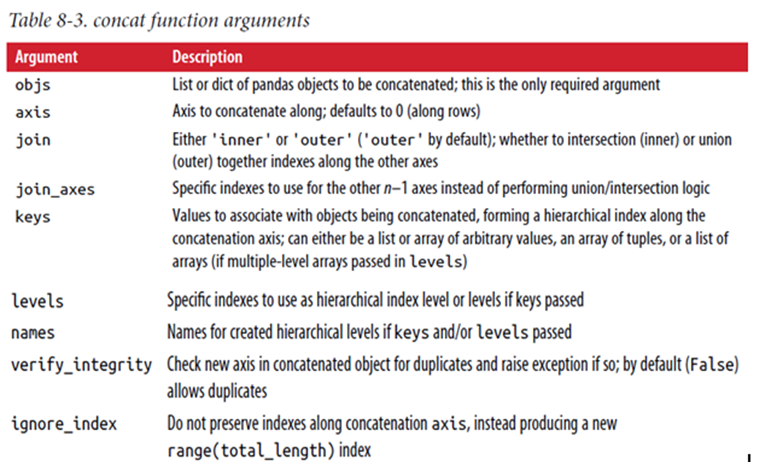

### Combining Data with Overlap

In [ ]:
#There is another data combination situation that can’t be expressed as either 
#a merge or concatenation operation. You may have two datasets whose indexes 
#overlap in full or part. As a motivating example, consider NumPy’s where 
#function, which performs the array-oriented equivalent of an if-else expression:

In [ ]:
a = pd.Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan],
              index=['f', 'e', 'd', 'c', 'b', 'a'])
b = pd.Series(np.arange(len(a), dtype=np.float64),
              index=['f', 'e', 'd', 'c', 'b', 'a'])
b[-1] = np.nan
print(a)
print(b)
np.where(pd.isnull(a), b, a)

f    NaN
e    2.5
d    NaN
c    3.5
b    4.5
a    NaN
dtype: float64
f    0.0
e    1.0
d    2.0
c    3.0
b    4.0
a    NaN
dtype: float64


array([0. , 2.5, 2. , 3.5, 4.5, nan])

In [ ]:
#Series has a combine_first method, which performs the equivalent of this 
#operation along with pandas’s usual data alignment logic:
b[:-2].combine_first(a[2:])

a    NaN
b    4.5
c    3.0
d    2.0
e    1.0
f    0.0
dtype: float64

In [ ]:
#With DataFrames, combine_first does the same thing column by column, so you
#can think of it as “patching” missing data in the calling object with data 
#from the object you pass:
df1 = pd.DataFrame({'a': [1., np.nan, 5., np.nan],
                    'b': [np.nan, 2., np.nan, 6.],
                    'c': range(2, 18, 4)})
df2 = pd.DataFrame({'a': [5., 4., np.nan, 3., 7.],
                    'b': [np.nan, 3., 4., 6., 8.]})
print(df1)
print(df2)
df1.combine_first(df2)

     a    b   c
0  1.0  NaN   2
1  NaN  2.0   6
2  5.0  NaN  10
3  NaN  6.0  14
     a    b
0  5.0  NaN
1  4.0  3.0
2  NaN  4.0
3  3.0  6.0
4  7.0  8.0


,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


## Reshaping and Pivoting

In [ ]:
#There are a number of basic operations for rearranging tabular data. These are 
#alternatingly referred to as reshape or pivot operations.

### Reshaping with Hierarchical Indexing

In [ ]:
#Hierarchical indexing provides a consistent way to rearrange data in a 
#DataFrame. There are two primary actions:
#stack - This “rotates” or pivots from the columns in the data to the rows
#unstack - This pivots from the rows into the columns

In [ ]:
#Consider a small Data‐Frame with string arrays as row and column indexes:
data = pd.DataFrame(np.arange(6).reshape((2, 3)),
                    index=pd.Index(['Ohio', 'Colorado'], name='state'),
                    columns=pd.Index(['one', 'two', 'three'],
                    name='number'))
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [ ]:
#Using the stack method on this data pivots the columns into the rows, 
#producing a Series:
result = data.stack()
print(type(result))
result

<class 'pandas.core.series.Series'>


state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int64

In [ ]:
#From a hierarchically indexed Series, you can rearrange the data back into a 
#Data‐Frame with unstack:
result.unstack()

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [ ]:
#By default the innermost level is unstacked (same with stack). You can unstack 
#a different level by passing a level number or name:
print(result)
print(result.unstack(0),"\n")
print(result.unstack(1),"\n")
result.unstack('state')

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int64
state   Ohio  Colorado
number                
one        0         3
two        1         4
three      2         5 

number    one  two  three
state                    
Ohio        0    1      2
Colorado    3    4      5 



state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [ ]:
#Unstacking might introduce missing data if all of the values in the level 
#aren’t found in each of the subgroups:
s1 = pd.Series([0, 1, 2, 3], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([4, 5, 6], index=['c', 'd', 'e'])
data2 = pd.concat([s1, s2], keys=['one', 'two'])
print(data2)
data2.unstack()

one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: int64


,a,b,c,d,e
one,0.0,1.0,2.0,3.0,NaN
two,NaN,NaN,4.0,5.0,6.0


In [ ]:
#Stacking filters out missing data by default, so the operation is more 
#easily invertible:
print(data2.unstack(), "\n")
print(data2.unstack().stack(), "\n")
data2.unstack().stack(dropna=False)

       a    b    c    d    e
one  0.0  1.0  2.0  3.0  NaN
two  NaN  NaN  4.0  5.0  6.0 

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
two  c    4.0
     d    5.0
     e    6.0
dtype: float64 



one  a    0.0
     b    1.0
     c    2.0
     d    3.0
     e    NaN
two  a    NaN
     b    NaN
     c    4.0
     d    5.0
     e    6.0
dtype: float64

In [ ]:
#When you unstack in a DataFrame, the level unstacked becomes the lowest level 
#in the result:
df = pd.DataFrame({'left': result, 'right': result + 5},
                  columns=pd.Index(['left', 'right'], name='side'))
print(df,"\n")
df.unstack('state')

side             left  right
state    number             
Ohio     one        0      5
         two        1      6
         three      2      7
Colorado one        3      8
         two        4      9
         three      5     10 



side   left          right         
state  Ohio Colorado  Ohio Colorado
number                             
one       0        3     5        8
two       1        4     6        9
three     2        5     7       10

In [ ]:
#When calling stack, we can indicate the name of the axis to stack:
df.unstack('state').stack('side')

state         Colorado  Ohio
number side                 
one    left          3     0
       right         8     5
two    left          4     1
       right         9     6
three  left          5     2
       right        10     7

### Pivoting “Long” to “Wide” Format

In [ ]:
#A common way to store multiple time series in databases and CSV is in so-called 
#long or stacked format. Let’s load some example data and do a small amount of 
#time series wrangling and other data cleaning:

In [ ]:
prg = pd.period_range('2010', '2015', freq='A')
prg
type(prg)
#The PeriodIndex class stores a sequence of periods and can serve as an axis 
#index in any pandas data structure:

pandas.core.indexes.period.PeriodIndex

In [ ]:
#PeriodIndex combines the year and quarter columns to create a kind of time 
#interval type.
data = pd.read_csv('macrodata.csv')
print(data.head())
periods = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                         name='date')
#PeriodIndex combines the year & quarter columns to create time interval type.
columns = pd.Index(['realgdp', 'infl', 'unemp'], name='item')
data = data.reindex(columns=columns)
print(data)
data.index = periods.to_timestamp('D', 'end')
print(data.index)
#ldata = data.stack().reset_index()
#print(ldata)
ldata = data.stack().reset_index().rename(columns={0: 'value'})

     year  quarter   realgdp  realcons  ...  unemp      pop  infl  realint
0  1959.0      1.0  2710.349    1707.4  ...    5.8  177.146  0.00     0.00
1  1959.0      2.0  2778.801    1733.7  ...    5.1  177.830  2.34     0.74
2  1959.0      3.0  2775.488    1751.8  ...    5.3  178.657  2.74     1.09
3  1959.0      4.0  2785.204    1753.7  ...    5.6  179.386  0.27     4.06
4  1960.0      1.0  2847.699    1770.5  ...    5.2  180.007  2.31     1.19

[5 rows x 14 columns]
item    realgdp  infl  unemp
0      2710.349  0.00    5.8
1      2778.801  2.34    5.1
2      2775.488  2.74    5.3
3      2785.204  0.27    5.6
4      2847.699  2.31    5.2
..          ...   ...    ...
198   13324.600 -3.16    6.0
199   13141.920 -8.79    6.9
200   12925.410  0.94    8.1
201   12901.504  3.37    9.2
202   12990.341  3.56    9.6

[203 rows x 3 columns]
DatetimeIndex(['1959-03-31 23:59:59.999999999',
               '1959-06-30 23:59:59.999999999',
               '1959-09-30 23:59:59.999999999',
           

In [ ]:
#This is the so-called long format for multiple time series, or other 
#observational data with two or more keys (here, our keys are date and item). 
#Each row in the table represents a single observation.
ldata[:10]

,date,item,value
0,1959-03-31 23:59:59.999999999,realgdp,2710.349
1,1959-03-31 23:59:59.999999999,infl,0.000
2,1959-03-31 23:59:59.999999999,unemp,5.800
3,1959-06-30 23:59:59.999999999,realgdp,2778.801
4,1959-06-30 23:59:59.999999999,infl,2.340
5,1959-06-30 23:59:59.999999999,unemp,5.100
6,1959-09-30 23:59:59.999999999,realgdp,2775.488
7,1959-09-30 23:59:59.999999999,infl,2.740
8,1959-09-30 23:59:59.999999999,unemp,5.300
9,1959-12-31 23:59:59.999999999,realgdp,2785.204


In [ ]:
#Data is frequently stored this way in relational databases like MySQL, as a 
#fixed schema (column names and data types) allows the number of distinct values 
#in the item column to change as data is added to the table. In the previous 
#example, date and item would usually be the primary keys (in relational 
#database parlance), offering both relational integrity and easier joins. In 
#some cases, the data may be more difficult to work with in this format; you 
#might prefer to have a DataFrame containing one column per distinct item value 
#indexed by timestamps in the date column.

In [ ]:
#Data‐Frame’s pivot method performs exactly this transformation:
pivoted = ldata.pivot('date', 'item', 'value')
pivoted

item,infl,realgdp,unemp
date,,,
1959-03-31 23:59:59.999999999,0.00,2710.349,5.8
1959-06-30 23:59:59.999999999,2.34,2778.801,5.1
1959-09-30 23:59:59.999999999,2.74,2775.488,5.3
1959-12-31 23:59:59.999999999,0.27,2785.204,5.6
1960-03-31 23:59:59.999999999,2.31,2847.699,5.2
...,...,...,...
2008-09-30 23:59:59.999999999,-3.16,13324.600,6.0
2008-12-31 23:59:59.999999999,-8.79,13141.920,6.9
2009-03-31 23:59:59.999999999,0.94,12925.410,8.1


In [ ]:
#The first two values passed are the columns to be used respectively as the row 
#and column index, then finally an optional value column to fill the DataFrame. 
#Suppose you had two value columns that you wanted to reshape simultaneously:
ldata['value2'] = np.random.randn(len(ldata))
ldata[:10]

,date,item,value,value2
0,1959-03-31 23:59:59.999999999,realgdp,2710.349,-0.204708
1,1959-03-31 23:59:59.999999999,infl,0.000,0.478943
2,1959-03-31 23:59:59.999999999,unemp,5.800,-0.519439
3,1959-06-30 23:59:59.999999999,realgdp,2778.801,-0.555730
4,1959-06-30 23:59:59.999999999,infl,2.340,1.965781
5,1959-06-30 23:59:59.999999999,unemp,5.100,1.393406
6,1959-09-30 23:59:59.999999999,realgdp,2775.488,0.092908
7,1959-09-30 23:59:59.999999999,infl,2.740,0.281746
8,1959-09-30 23:59:59.999999999,unemp,5.300,0.769023
9,1959-12-31 23:59:59.999999999,realgdp,2785.204,1.246435


In [ ]:
#By omitting the last argument, you obtain a DataFrame with hierarchical columns:
pivoted = ldata.pivot('date', 'item')
print(pivoted[:5])
pivoted['value'][:5]

                              value            ...    value2          
item                           infl   realgdp  ...   realgdp     unemp
date                                           ...                    
1959-03-31 23:59:59.999999999  0.00  2710.349  ... -0.204708 -0.519439
1959-06-30 23:59:59.999999999  2.34  2778.801  ... -0.555730  1.393406
1959-09-30 23:59:59.999999999  2.74  2775.488  ...  0.092908  0.769023
1959-12-31 23:59:59.999999999  0.27  2785.204  ...  1.246435 -1.296221
1960-03-31 23:59:59.999999999  2.31  2847.699  ...  0.274992  1.352917

[5 rows x 6 columns]


item,infl,realgdp,unemp
date,,,
1959-03-31 23:59:59.999999999,0.00,2710.349,5.8
1959-06-30 23:59:59.999999999,2.34,2778.801,5.1
1959-09-30 23:59:59.999999999,2.74,2775.488,5.3
1959-12-31 23:59:59.999999999,0.27,2785.204,5.6
1960-03-31 23:59:59.999999999,2.31,2847.699,5.2


In [ ]:
#Note that pivot is equivalent to creating a hierarchical index using set_index 
#followed by a call to unstack:
unstacked = ldata.set_index(['date', 'item']).unstack('item')
unstacked[:7]

value                
item                           infl   realgdp unemp
date                                               
1959-03-31 23:59:59.999999999  0.00  2710.349   5.8
1959-06-30 23:59:59.999999999  2.34  2778.801   5.1
1959-09-30 23:59:59.999999999  2.74  2775.488   5.3
1959-12-31 23:59:59.999999999  0.27  2785.204   5.6
1960-03-31 23:59:59.999999999  2.31  2847.699   5.2
1960-06-30 23:59:59.999999999  0.14  2834.390   5.2
1960-09-30 23:59:59.999999999  2.70  2839.022   5.6

### Pivoting “Wide” to “Long” Format

In [ ]:
#An inverse operation to pivot for DataFrames is pandas.melt. Rather than 
#transforming one column into many in a new DataFrame, it merges multiple 
#columns into one, producing a DataFrame that is longer than the input. 
#Let’s look at an example:

In [ ]:
df = pd.DataFrame({'key': ['foo', 'bar', 'baz'],
                   'A': [1, 2, 3],
                   'B': [4, 5, 6],
                   'C': [7, 8, 9]})
df

,key,A,B,C
0,foo,1,4,7
1,bar,2,5,8
2,baz,3,6,9


In [ ]:
#The 'key' column may be a group indicator, and the other columns are data 
#values. When using pandas.melt, we must indicate which columns (if any) are 
#group indicators. Let’s use 'key' as the only group indicator here:
melted = pd.melt(df, ['key'])
melted

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6
6,foo,C,7
7,bar,C,8
8,baz,C,9


In [ ]:
#Using pivot, we can reshape back to the original layout:
reshaped = melted.pivot('key', 'variable', 'value')
reshaped

variable,A,B,C
key,,,
bar,2,5,8
baz,3,6,9
foo,1,4,7


In [ ]:
#Since the result of pivot creates an index from the column used as the row 
#labels, we may want to use reset_index to move the data back into a column:
reshaped.reset_index()

variable,key,A,B,C
0,bar,2,5,8
1,baz,3,6,9
2,foo,1,4,7


In [ ]:
#You can also specify a subset of columns to use as value columns:
pd.melt(df, id_vars=['key'], value_vars=['A', 'B'])

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6


In [ ]:
print(pd.melt(df, value_vars=['A', 'B', 'C']))
pd.melt(df, value_vars=['key', 'A', 'B'])

  variable  value
0        A      1
1        A      2
2        A      3
3        B      4
4        B      5
5        B      6
6        C      7
7        C      8
8        C      9


,variable,value
0,key,foo
1,key,bar
2,key,baz
3,A,1
4,A,2
5,A,3
6,B,4
7,B,5
8,B,6


## References

http://queirozf.com/entries/pandas-time-series-examples-datetimeindex-periodindex-and-timedeltaindex#plot-distribution-per-unit-time

https://pandasguide.readthedocs.io/en/latest/Pandas/timeseries.html

In [ ]:
#Content Beyond the curriculum
# this is the original dataframe
df = pd.DataFrame({
    'name':['john','mary','peter','jeff','bill'],
    'date_of_birth':[
        '2000-01-01', '1999-12-20', '2000-11-01', '1995-02-25', '1992-06-30',
    ],
})

print(df.index)
# RangeIndex(start=0, stop=5, step=1)

# convert the column (it's a string) to datetime type
datetime_series = pd.to_datetime(df['date_of_birth'])

# create datetime index passing the datetime series
datetime_index = pd.DatetimeIndex(datetime_series.values)

df2=df.set_index(datetime_index)

# we don't need the column anymore
df2.drop('date_of_birth',axis=1,inplace=True)

print(df2.index)
df2


RangeIndex(start=0, stop=5, step=1)
DatetimeIndex(['2000-01-01', '1999-12-20', '2000-11-01', '1995-02-25',
               '1992-06-30'],
              dtype='datetime64[ns]', freq=None)


,name
2000-01-01,john
1999-12-20,mary
2000-11-01,peter
1995-02-25,jeff
1992-06-30,bill
